# Importing the necessary packages and data


In [1]:
import pandas as pd

pd.__version__

'1.4.2'

In [2]:
from sklearn.model_selection import train_test_split

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
main_df=pd.read_pickle('Data/Data_from_imdb.pkl')
#main_df=pd.read_csv('Data/Data_from_imdb.csv')

nominee_vector=pd.read_csv('Data/df_of_nominees.csv')

y=nominee_vector['is_nominee'].copy()

# Making the train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(main_df.copy(), y,
                                                       shuffle=True,
                                                       random_state=126029,
                                                       test_size=.2,
                                                       stratify=y
                                                   )

# Making the date information readable

In [142]:
def get_dates_df(df,y):
    '''input the dataframe of movie info (df) and vector of nominee info (y)
    outputs two dataframes:
    a dataframe with imdb_id, day, month, year, and country of original_air_date and
    a dataframe of the corresponding nominee status'''
    dates_df= pd.DataFrame({'imdb_id': [],
                        'day':[],
                        'month':[] ,
                        'year':[],
                        'country':[]})
    new_y=pd.DataFrame({'is_nominee':[]})
    for i in range(0, len(df)):
        #print(i)
        newrow=[]
        row=df.iloc[i]
        #print(row)
        if row['origingal air date'] == []:
            #skip because we don't have info
            pass            
        elif row['origingal air date'][2] == ' ':
            #we have day-month-year
            #print('Day-MY')
            newrow.append(row['imdb id'])
            newrow.append(row['origingal air date'][0:2] )
            newrow.append(row['origingal air date'][3:6])
            newrow.append(row['origingal air date'][7:11])
            newrow.append(row['origingal air date'][12:])
        elif row['origingal air date'][0] in 'JFMASOND':
            #we have month-year
            #print('MONTH-YEAR!')
            newrow.append(row['imdb id'])
            newrow.append('')
            newrow.append(row['origingal air date'][0:3])
            newrow.append(row['origingal air date'][4:8])
            newrow.append(row['origingal air date'][9:])
        else: #row['origingal air date'][2] in '1234567890':
            #we have year
            #print('YEAR ONLY!')
            #print(i)
            newrow.append(row['imdb id'])
            newrow.append('')
            newrow.append('')
            newrow.append(row['origingal air date'][0:5])
            newrow.append(row['origingal air date'][6:])
        #print('newrow is')
        #print(newrow)
        if newrow !=[] :
            dates_df.loc[len(dates_df.index)] = newrow 
            new_y.loc[len(new_y.index)]=y.iloc[i]
    return(dates_df, new_y)

In [143]:
dates_df, nominees_df= get_dates_df(X_train,y_train)

In [144]:
#create a new column of dates_df that reads the month as a number 1-12
#if no month is given, reads as 0
month_number=[]
for i in range(len(dates_df)):
    if dates_df['month'][i] == 'Jan':
        month_number.append(1)
    elif  dates_df['month'][i] =='Feb':
        month_number.append(2)
    elif  dates_df['month'][i] == 'Mar':
        month_number.append(3)
    elif dates_df['month'][i] == 'Apr':
        month_number.append(4)
    elif dates_df['month'][i] == 'May':
        month_number.append(5)
    elif  dates_df['month'][i] == 'Jun':
        month_number.append(6)
    elif dates_df['month'][i] == 'Jul':
        month_number.append(7)
    elif dates_df['month'][i] == 'Aug':
        month_number.append(8)
    elif dates_df['month'][i] == 'Sep':
        month_number.append(9)
    elif  dates_df['month'][i] == 'Oct':
        month_number.append(10)
    elif dates_df['month'][i] == 'Nov':
        month_number.append(11)
    elif  dates_df['month'][i] == 'Dec':
        month_number.append(12)
    elif dates_df['month'][i] =='':
        month_number.append(0)
    else:
        print('You MISSED one!')
        print(dates_df['month'][i])

In [145]:
dates_df['month_num']=month_number

In [202]:
dates_df.sample(10)

,imdb_id,day,month,year,country,month_num
2020,2318440,,Aug,2014,(USA),8
823,14501226,22,Dec,2006,(USA),12
1722,3666024,20,Jan,2017,(USA),1
2577,2948356,04,Mar,2016,(USA),3
610,1851909,05,Mar,2011,(Japan),3
1381,11212672,01,Jan,2019,(USA),1
1076,12369756,05,May,2020,(USA),5
1426,13048312,11,Jun,2021,(Japan),6
2052,4926026,23,Sep,2015,(Belgium),9
265,6139698,07,Mar,2015,(Japan),3


# Visualizing the data

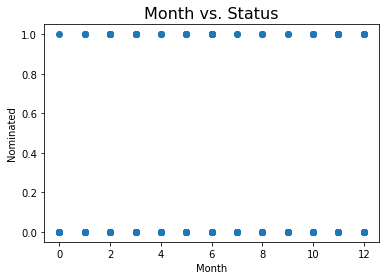

In [151]:
#A scatter plot of month vs. nomination status
plt.scatter(dates_df['month_num'],
           nominees_df['is_nominee'])

plt.xlabel("Month")
plt.ylabel("Nominated")
plt.title("Month vs. Status", fontsize=16)
plt.show()

This just tell us that every month, a nominated movie and a non-nominated movie have been released.  That's not super exicting...

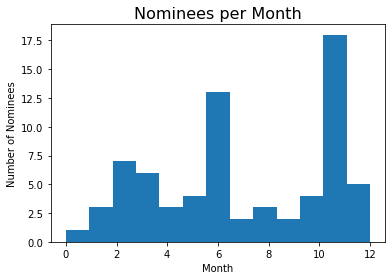

In [186]:
#histogram of nominees each month
#First, we create a list of just the nominees' months
nominee_months=[]
for i in range(len(dates_df)):
    if nominees_df['is_nominee'][i]==1:
        nominee_months.append(dates_df['month_num'][i])

#Now we make a histogram of the months
plt.hist(nominee_months,
             bins=13)

plt.xlabel("Month")
plt.ylabel("Number of Nominees")
plt.title("Nominees per Month", fontsize=16)

plt.show()

So, it seems that November is a really good month to release an animated movie!  Otherwise, June is a good month.

But, perhaps November and June are just when a lot of movies are released.  Let's explore the proportion of released movies that get nominated each month.

In [193]:
#First, we create counts for movies each month and nominees each month
total_movies=np.zeros(13)
total_nominated_movies=np.zeros(13)
for i in range(len(dates_df)):
    total_movies[dates_df['month_num'][i]]=total_movies[dates_df['month_num'][i]]+1
    if nominees_df['is_nominee'][i] == 1:
        total_nominated_movies[dates_df['month_num'][i]]=total_nominated_movies[dates_df['month_num'][i]]+1

proportion = [total_nominated_movies[i]/total_movies[i] for i in range(13)]

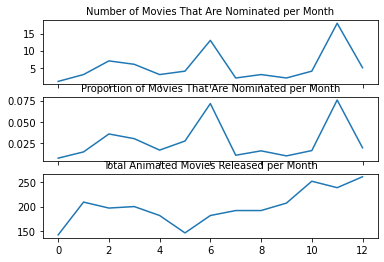

In [213]:
#Some plots to show any trends

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.plot(range(13), total_nominated_movies)
ax1.set_title("Number of Movies That Are Nominated per Month", fontsize=10)

ax2.plot(range(13), proportion)
ax2.set_title("Proportion of Movies That Are Nominated per Month", fontsize=10)

ax3.plot(range(13), total_movies)
ax3.set_title("Total Animated Movies Released per Month", fontsize=10)


plt.show()

So, the spikes in nominated movies don't seem to correlate with spikes in movie production!  Month of release might be a good indicator of nomination status.